# MINERIA DE DATOS - TUIA  
## Trabajo práctico N° 3
### Estudiante: Yañez, Mirian

### El siguiente trabajo se realiza con el conjunto de datos "CoffeeRatings.csv"

### Instalo las dependencias necesarias

In [95]:
pip install imblearn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.tree import plot_tree
#Warnings
import warnings
warnings.simplefilter('ignore')
# Balance
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder



### Carga del dataset

df = pd.read_csv('CoffeeRatings.csv', delimiter=';')

### Análisis del conjunto de datos (distribuciones, valores, outliers, tipos de datos, etc.)

In [97]:
df

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total,Color
0,85,85,80,80,80,80,100,100,12,8692,Green
1,85,817,80,775,80,80,100,100,12,8642,Green
2,833,80,80,80,775,80,100,100,11,8608,Blue-Green
3,80,80,80,767,775,80,100,100,11,8542,Blue-Green
4,80,792,775,775,80,775,100,100,11,8492,Green
...,...,...,...,...,...,...,...,...,...,...,...
830,758,70,675,692,70,692,100,100,11,7917,Green
831,758,767,742,742,767,767,867,867,1,7908,Green
832,0,0,0,0,0,0,0,0,12,0,Green
833,767,775,783,767,792,783,100,792,1,825,Bluish-Green


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Scores_Aroma       835 non-null    int64 
 1   Scores_Flavor      835 non-null    int64 
 2   Scores_Aftertaste  835 non-null    int64 
 3   Scores_Acidity     835 non-null    int64 
 4   Scores_Body        835 non-null    int64 
 5   Scores_Balance     835 non-null    int64 
 6   Scores_Uniformity  835 non-null    int64 
 7   Scores_Sweetness   835 non-null    int64 
 8   Scores_Moisture    835 non-null    int64 
 9   Scores_Total       835 non-null    int64 
 10  Color              835 non-null    object
dtypes: int64(10), object(1)
memory usage: 71.9+ KB


### El conjunto de datos consta de 835 registros y 11 variables, con 10 de ellas siendo variables numéricas (de tipo int64) y 1 variable categórica (de tipo object).
### No hay valores nulos en ninguna de las variables

## Estadística descriptiva

In [99]:
df.describe().round(2)

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total
count,835.00,835.00,835.00,835.00,835.00,835.00,835.00,835.00,835.00,835.00
mean,623.73,615.58,611.68,617.12,610.33,611.28,191.76,157.64,9.71,6675.44
std,273.72,274.25,263.87,274.48,276.37,276.30,257.58,203.44,4.01,3007.52
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,717.00,708.00,683.00,717.00,708.00,692.00,100.00,100.00,11.00,7792.00
50%,758.00,742.00,733.00,742.00,742.00,742.00,100.00,100.00,11.00,8183.00
75%,775.00,767.00,758.00,767.00,767.00,767.00,100.00,100.00,12.00,8325.00
max,875.00,883.00,867.00,875.00,842.00,858.00,933.00,933.00,17.00,9058.00


## Matriz de correlación

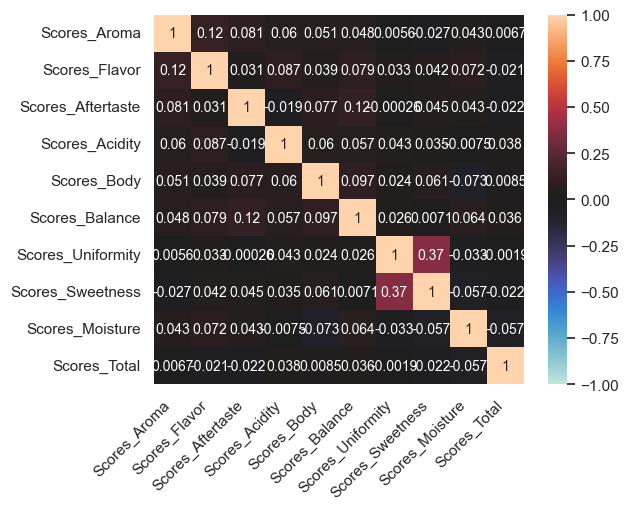

In [100]:
corr = df.drop(['Color'], axis=1).corr()
ax = sns.heatmap(
                corr,
                vmin=-1, vmax=1, center=0,
                square=True,
                annot = True,
                annot_kws = {'size': 10}
            )
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

### Distribución de la variable Color

In [101]:
df['Color'].value_counts()

Color
Green           681
Bluish-Green     96
Blue-Green       58
Name: count, dtype: int64

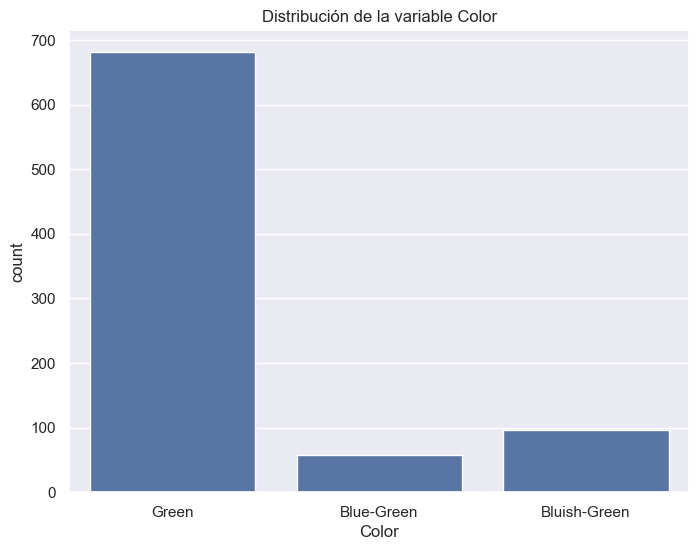

In [102]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Color', data=df)
plt.title('Distribución de la variable Color')
plt.show()

### Histogramas de variables numéricas

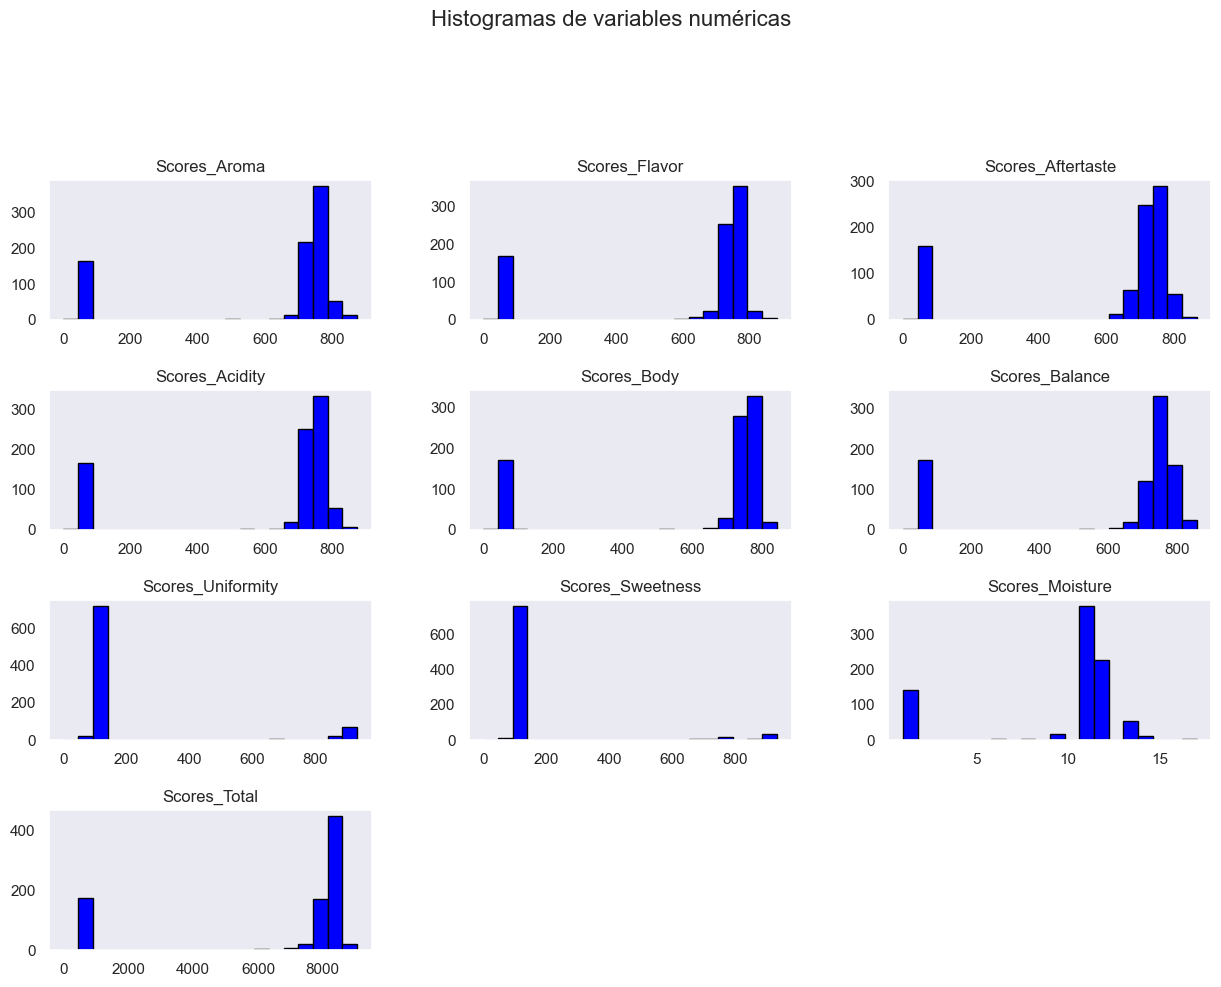

In [103]:
columnas_numericas = df.select_dtypes(include=['int64']).columns
df[columnas_numericas].hist(bins=20, figsize=(15, 10), color='blue', edgecolor='black', grid=False)
plt.suptitle('Histogramas de variables numéricas', x=0.5, y=1.05, fontsize=16)
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

### Boxplot para visualizar outliers

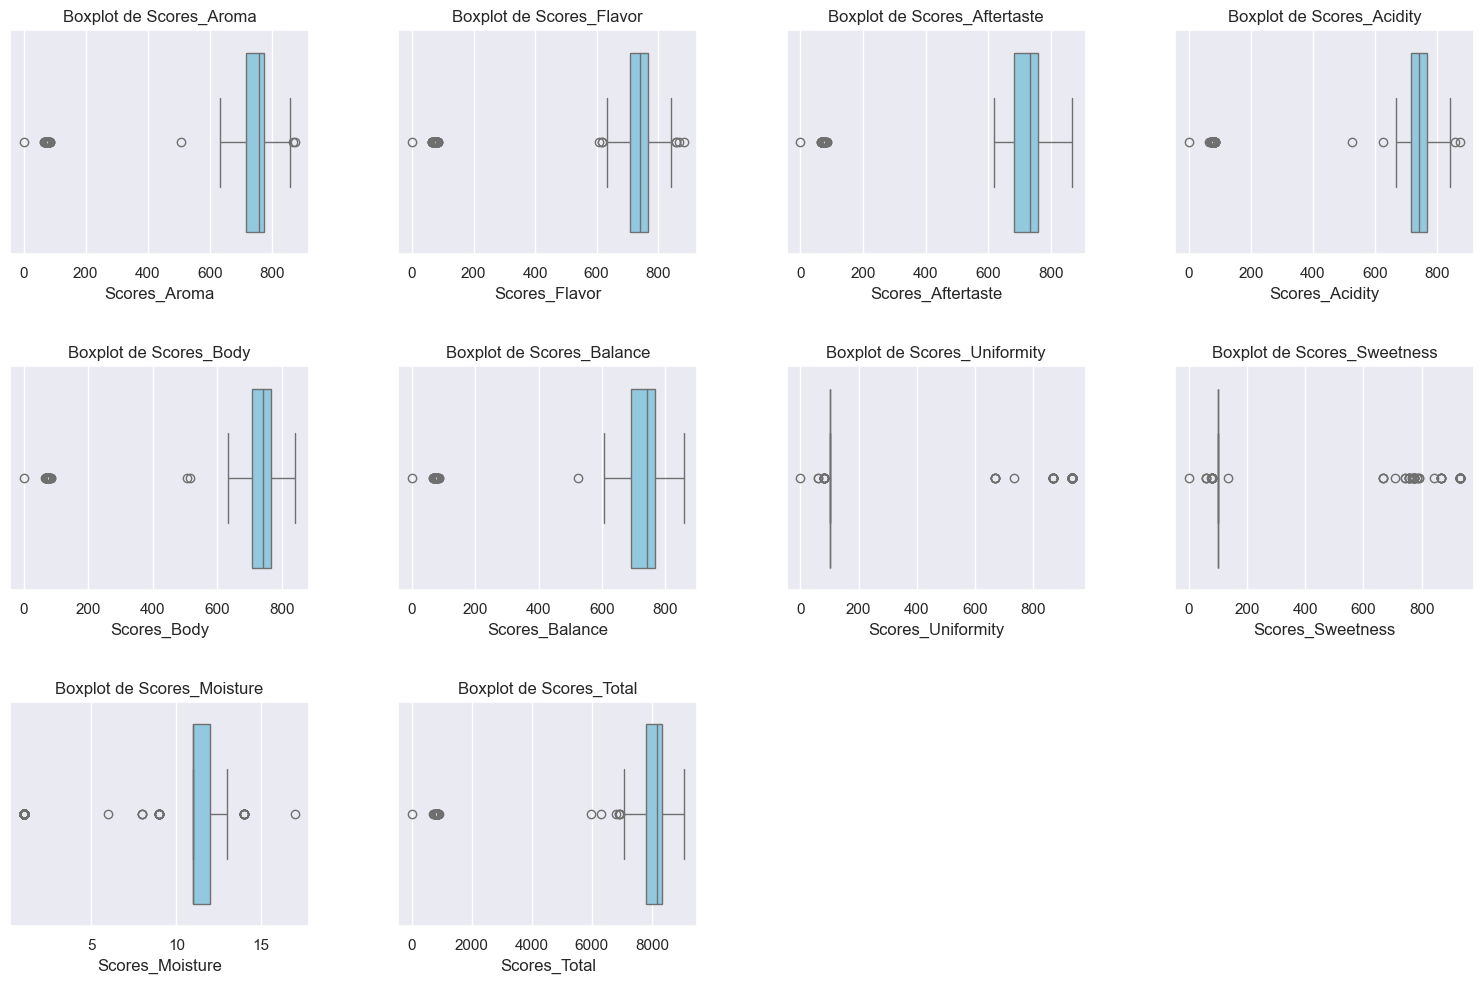

In [104]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(columnas_numericas, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Boxplot de {feature}')
plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

### Análisis de datos nulos o faltantes

In [105]:
df.isna().sum()


Scores_Aroma         0
Scores_Flavor        0
Scores_Aftertaste    0
Scores_Acidity       0
Scores_Body          0
Scores_Balance       0
Scores_Uniformity    0
Scores_Sweetness     0
Scores_Moisture      0
Scores_Total         0
Color                0
dtype: int64

Se observa que no existen valores nulos pero hay registros con ausencia de datos (ceros). Se analiza si se descartan para el análisis o se imputan con algún valor de tendencia central.


In [106]:
data_with_zeros = df.loc[(df == 0).any(axis=1)]
data_with_zeros

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total,Color
832,0,0,0,0,0,0,0,0,12,0,Green


#### Se observa que la columna que tiene zeros es Scores_Moisture, por eso vamos a reemplazar dicho valores por la media

In [107]:
df['Scores_Moisture'] = df['Scores_Moisture'].replace(0, df['Scores_Moisture'].median())


## Estandarización

In [108]:
df_sub = df.drop('Color', axis=1)
scaler_mm = MinMaxScaler()
X_scaled = scaler_mm.fit_transform(df_sub)
# Crear un nuevo DataFrame estandarizado con los nombres de las columnas originales
df_std2 = pd.DataFrame(X_scaled, columns=df_sub.columns)

In [109]:
df_std2.describe().round(2)

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total
count,835.00,835.00,835.00,835.00,835.00,835.00,835.00,835.00,835.00,835.00
mean,0.71,0.70,0.71,0.71,0.72,0.71,0.21,0.17,0.54,0.74
std,0.31,0.31,0.30,0.31,0.33,0.32,0.28,0.22,0.25,0.33
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.82,0.80,0.79,0.82,0.84,0.81,0.11,0.11,0.62,0.86
50%,0.87,0.84,0.85,0.85,0.88,0.86,0.11,0.11,0.62,0.90
75%,0.89,0.87,0.87,0.88,0.91,0.89,0.11,0.11,0.69,0.92
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Para la continuidad del trabajo se optará por el escalado min-max por estos motivos:
* Sensibilidad a Outliers: El escalado min-max es menos sensible a los valores atípicos en comparación con el z-score.
* Requisitos del Modelo: los modelos que debo implementar a continuación, como las Máquinas de Soporte Vectorial (SVM) con kernel no lineal, pueden ser sensibles a la escala y pueden beneficiarse de la escala min-max, que mantiene la información relativa de las características en el rango original.

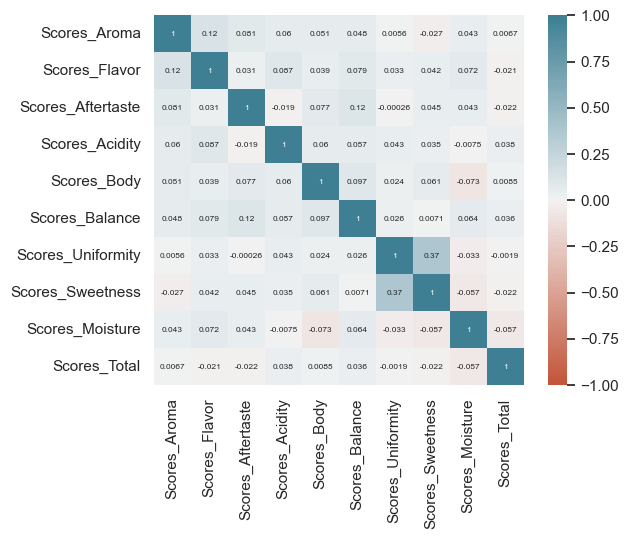

In [110]:
corr = df_std2.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='center'
)
plt.show()

In [111]:
encoder = LabelEncoder()
df_std2['Color'] = encoder.fit_transform(df['Color'])

In [112]:
df_std2['Color']


0      2
1      2
2      0
3      0
4      2
      ..
830    2
831    2
832    2
833    1
834    0
Name: Color, Length: 835, dtype: int64

## Conjuntos de Entrenamiento y Prueba

In [113]:
# Separación de variables explicativas y variables objetivo
X = df_std2.drop(['Color'], axis=1).copy()
y = df_std2[['Color']].copy() 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Crear un nuevo DataFrame para TRAIN y para TEST

In [114]:
df_train = pd.DataFrame(X_train, columns=X.columns)
df_train['Color'] = y['Color']

df_test = pd.DataFrame(X_test, columns=X.columns)
df_test['Color'] = y['Color']

## Balance de datos - SMOTE

(Synthetic Minority Over-sampling Technique). SMOTE crea instancias sintéticas de las clases minoritarias mediante la interpolación de ejemplos existentes.

Esta sección se agrega, a modo experimental, al evaluar las métricas del modelo de clasificación, intentando mejorar los resultados con esta estrategia.

In [115]:
X_smote = df_train.drop('Color', axis=1)
y_smote = df_train['Color']
# Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_smote, y_smote)
# Crear un nuevo DataFrame con los datos resampleados
df_smote = pd.DataFrame(X_train_resampled, columns=X_smote.columns)
# Añadir la columna 'RainTomorrow' al DataFrame resampleado
df_smote['Color'] = y_train_resampled

In [116]:
df_smote["Color"].value_counts()

Color
2    546
1    546
0    546
Name: count, dtype: int64

### Podemos observar que luego de aplicar el metodo de smote ahora tenemos la misma cantidad de elemntos en cada clase.

# SVM - Kernel lineal

In [117]:
# Conjuntos de train y test
X_train = df_smote.drop('Color', axis=1)
y_train = df_smote['Color']

X_test = df_test.drop('Color', axis=1)
y_test = df_test['Color']

In [118]:
# Inicializa el modelo SVM con kernel lineal
svm_linear = SVC(kernel='linear', C=1,  random_state=42)
# Entrena el modelo en el conjunto de entrenamiento balanceado
svm_linear.fit(X_train, y_train)
y_pred_svm_linear = svm_linear.predict(X_test)
# Evalúa el rendimiento del modelo
print("Accuracy:", accuracy_score(y_test, y_pred_svm_linear ))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm_linear ))

Accuracy: 0.3473053892215569

Classification Report:
               precision    recall  f1-score   support

           0       0.07      0.25      0.11        12
           1       0.15      0.50      0.23        20
           2       0.82      0.33      0.47       135

    accuracy                           0.35       167
   macro avg       0.34      0.36      0.27       167
weighted avg       0.68      0.35      0.42       167



## Predicciones (c = 1)

In [119]:
# Tabla de resultados para ver las predicciones
classification_table = pd.DataFrame({'Actual': y_test, 'Predicc.': y_pred_svm_linear })
classification_table.sample(15)

,Actual,Predicc.
734,2,0
483,2,2
548,2,1
689,2,1
412,2,1
640,2,1
120,2,2
486,2,2
682,2,2
611,1,2


## Hiperparámetros y Validación Cruzada

Parámetro C: 0.1
Validación Cruzada (Precisión): 0.5146770343850228
Conjunto de Prueba (Precisión): 0.7206130690683179
Conjunto de Prueba (Exhaustividad): 0.31736526946107785
Conjunto de Prueba (Exactitud): 0.31736526946107785
Conjunto de Prueba (F1-Score): 0.37574848848124925

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.08      0.33      0.13        12
           1       0.16      0.60      0.25        20
           2       0.86      0.27      0.42       135

    accuracy                           0.32       167
   macro avg       0.37      0.40      0.27       167
weighted avg       0.72      0.32      0.38       167



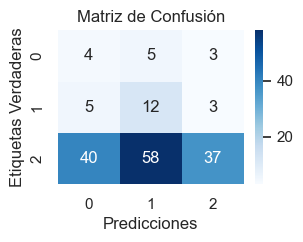



------
Parámetro C: 1
Validación Cruzada (Precisión): 0.5061329902289848
Conjunto de Prueba (Precisión): 0.6840695813258152
Conjunto de Prueba (Exhaustividad): 0.3473053892215569
Conjunto de Prueba (Exactitud): 0.3473053892215569
Conjunto de Prueba (F1-Score): 0.4180133381150584

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.07      0.25      0.11        12
           1       0.15      0.50      0.23        20
           2       0.82      0.33      0.47       135

    accuracy                           0.35       167
   macro avg       0.34      0.36      0.27       167
weighted avg       0.68      0.35      0.42       167



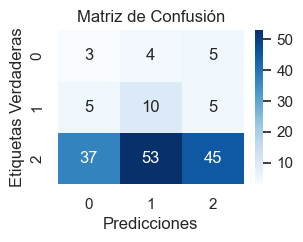



------
Parámetro C: 5
Validación Cruzada (Precisión): 0.5037014246289252
Conjunto de Prueba (Precisión): 0.6707150633797341
Conjunto de Prueba (Exhaustividad): 0.3413173652694611
Conjunto de Prueba (Exactitud): 0.3413173652694611
Conjunto de Prueba (F1-Score): 0.41354353204425703

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.07      0.25      0.11        12
           1       0.14      0.45      0.21        20
           2       0.80      0.33      0.47       135

    accuracy                           0.34       167
   macro avg       0.34      0.34      0.26       167
weighted avg       0.67      0.34      0.41       167



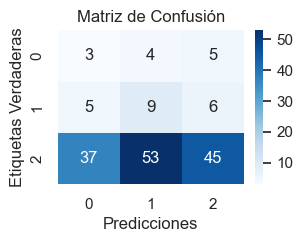



------
Parámetro C: 10
Validación Cruzada (Precisión): 0.5024819124338032
Conjunto de Prueba (Precisión): 0.6707150633797341
Conjunto de Prueba (Exhaustividad): 0.3413173652694611
Conjunto de Prueba (Exactitud): 0.3413173652694611
Conjunto de Prueba (F1-Score): 0.41354353204425703

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.07      0.25      0.11        12
           1       0.14      0.45      0.21        20
           2       0.80      0.33      0.47       135

    accuracy                           0.34       167
   macro avg       0.34      0.34      0.26       167
weighted avg       0.67      0.34      0.41       167



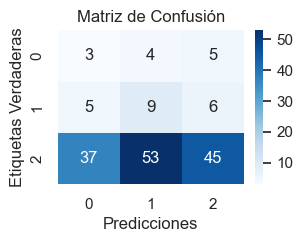



------


In [120]:
# Lista de valores para el parámetro de costo (C)
parametros_c = [0.1, 1, 5, 10]

# Validación cruzada para cada valor de C
for c in parametros_c:
    # Crear un clasificador SVM con kernel lineal y el valor de C actual
    svm_clf = SVC(kernel='linear', C=c,  random_state=42)
    scores = cross_val_score(svm_clf, X_train, y_train, cv=5, scoring='accuracy')
    svm_clf.fit(X_train, y_train)
    y_pred = svm_clf.predict(X_test)

    # Métricas en el conjunto de prueba
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Mostrar resultados
    print(f"Parámetro C: {c}")
    print(f"Validación Cruzada (Precisión): {scores.mean()}")
    print(f"Conjunto de Prueba (Precisión): {precision}")
    print(f"Conjunto de Prueba (Exhaustividad): {recall}")
    print(f"Conjunto de Prueba (Exactitud): {accuracy}")
    print(f"Conjunto de Prueba (F1-Score): {f1}")

    # Reporte de Clasificación
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred))

    # Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(3, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_clf.classes_, yticklabels=svm_clf.classes_)
    plt.title("Matriz de Confusión")
    plt.xlabel("Predicciones")
    plt.ylabel("Etiquetas Verdaderas")
    plt.show()

    # Separador
    print("\n\n------")

## Conclusiones
**Parámetro C = 0.1**

La precisión obtenida en el conjunto de prueba es relativamente alta (0.7206), lo que indica que el modelo tiene una buena capacidad para predecir correctamente la clase.
Sin embargo, la exhaustividad (recall) es bastante baja (0.3174), lo que sugiere que el modelo tiende a perder algunas instancias de la clase positiva. La exactitud general y el F1-Score también son bajos, indicando un rendimiento general insatisfactorio.

**Parámetro C = 1**

La precisión en el conjunto de prueba disminuyó en comparación con C=0.1 (0.6841), pero aún se mantiene a un nivel razonable.
La exhaustividad mejoró ligeramente (0.3473) en comparación con C=0.1, pero sigue siendo baja.
La exactitud general y el F1-Score se mantienen bajos, indicando que el modelo aún tiene deficiencias en la clasificación.

**Parámetro C = 10**

La precisión en el conjunto de prueba sigue disminuyendo (0.6707), y la exhaustividad también sigue siendo baja (0.3413).
La exactitud general y el F1-Score siguen siendo bajos, lo que indica que el rendimiento general del modelo no mejora significativamente.

**CONCLUSIÓN:**

A medida que el parámetro de regularización C aumenta, la precisión en el conjunto de prueba tiende a disminuir, lo que podría indicar que el modelo está sobreajustando.
La baja exhaustividad sugiere que el modelo tiene dificultades para identificar todas las instancias de la clase positiva.
El bajo F1-Score también refleja la falta de equilibrio entre precisión y exhaustividad.

Podría ser beneficioso explorar otros tipos de kernels para mejorar el rendimiento del modelo. Se implementa a continuación.

# SVM - Kernel gaussiano

Permite la clasificación no lineal al mapear las instancias en un espacio de características de mayor dimensión. Este kernel es especialmente útil cuando las instancias no son separables por un hiperplano en el espacio de características original.


In [121]:
X_train = df_smote.drop('Color', axis=1)
y_train = df_smote['Color']

X_test = df_test.drop('Color', axis=1)
y_test = df_test['Color']
# Inicializa el modelo SVM con kernel gaussiano (rbf)
svm_gauss = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_gauss.fit(X_train, y_train)
y_pred_svm_gauss = svm_gauss.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_svm_linear ))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm_linear ))

Accuracy: 0.3473053892215569

Classification Report:
               precision    recall  f1-score   support

           0       0.07      0.25      0.11        12
           1       0.15      0.50      0.23        20
           2       0.82      0.33      0.47       135

    accuracy                           0.35       167
   macro avg       0.34      0.36      0.27       167
weighted avg       0.68      0.35      0.42       167



## Hiperparámetros y Validación Cruzada

Parámetro C: 0.1
Validación Cruzada (Precisión): 0.5769355560528082
Conjunto de Prueba (Precisión): 0.696636493209893
Conjunto de Prueba (Exhaustividad): 0.4251497005988024
Conjunto de Prueba (Exactitud): 0.4251497005988024
Conjunto de Prueba (F1-Score): 0.5053864336105117

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.03      0.08      0.04        12
           1       0.16      0.45      0.24        20
           2       0.84      0.45      0.59       135

    accuracy                           0.43       167
   macro avg       0.34      0.33      0.29       167
weighted avg       0.70      0.43      0.51       167



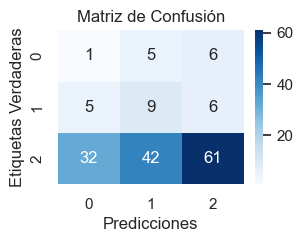



------
Parámetro C: 1
Validación Cruzada (Precisión): 0.6379913478033863
Conjunto de Prueba (Precisión): 0.6810094845274487
Conjunto de Prueba (Exhaustividad): 0.437125748502994
Conjunto de Prueba (Exactitud): 0.437125748502994
Conjunto de Prueba (F1-Score): 0.5098990556268651

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.04      0.08      0.05        12
           1       0.14      0.45      0.21        20
           2       0.82      0.47      0.59       135

    accuracy                           0.44       167
   macro avg       0.33      0.33      0.29       167
weighted avg       0.68      0.44      0.51       167



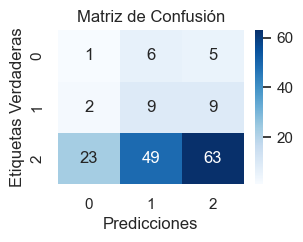



------
Parámetro C: 5
Validación Cruzada (Precisión): 0.6605765644812411
Conjunto de Prueba (Precisión): 0.6655303396065595
Conjunto de Prueba (Exhaustividad): 0.39520958083832336
Conjunto de Prueba (Exactitud): 0.39520958083832336
Conjunto de Prueba (F1-Score): 0.47257262333796296

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.04      0.08      0.05        12
           1       0.12      0.40      0.18        20
           2       0.80      0.42      0.55       135

    accuracy                           0.40       167
   macro avg       0.32      0.30      0.26       167
weighted avg       0.67      0.40      0.47       167



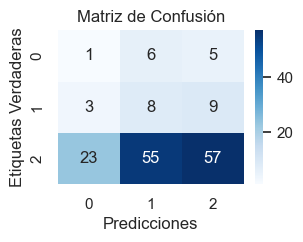



------
Parámetro C: 10
Validación Cruzada (Precisión): 0.6776758409785932
Conjunto de Prueba (Precisión): 0.6871096516644132
Conjunto de Prueba (Exhaustividad): 0.4550898203592814
Conjunto de Prueba (Exactitud): 0.4550898203592814
Conjunto de Prueba (F1-Score): 0.52885692030573

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.04      0.08      0.06        12
           1       0.13      0.40      0.20        20
           2       0.83      0.50      0.62       135

    accuracy                           0.46       167
   macro avg       0.33      0.33      0.29       167
weighted avg       0.69      0.46      0.53       167



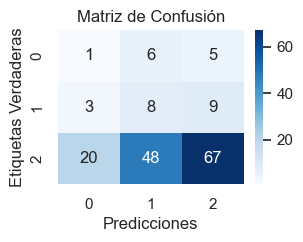



------
Parámetro C: 20
Validación Cruzada (Precisión): 0.692930931602894
Conjunto de Prueba (Precisión): 0.6919354653932669
Conjunto de Prueba (Exhaustividad): 0.49101796407185627
Conjunto de Prueba (Exactitud): 0.49101796407185627
Conjunto de Prueba (F1-Score): 0.5597869733970554

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.08      0.17      0.11        12
           1       0.13      0.35      0.19        20
           2       0.83      0.54      0.65       135

    accuracy                           0.49       167
   macro avg       0.35      0.35      0.32       167
weighted avg       0.69      0.49      0.56       167



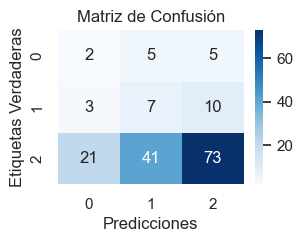



------
Parámetro C: 50
Validación Cruzada (Precisión): 0.7161333631684941
Conjunto de Prueba (Precisión): 0.6858017494638989
Conjunto de Prueba (Exhaustividad): 0.5029940119760479
Conjunto de Prueba (Exactitud): 0.5029940119760479
Conjunto de Prueba (F1-Score): 0.5738903916558923

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.06      0.17      0.09        12
           1       0.08      0.15      0.10        20
           2       0.83      0.59      0.69       135

    accuracy                           0.50       167
   macro avg       0.32      0.30      0.29       167
weighted avg       0.69      0.50      0.57       167



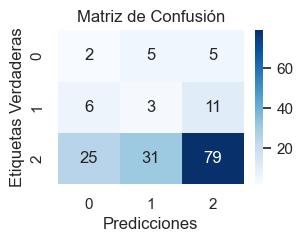



------
Parámetro C: 100
Validación Cruzada (Precisión): 0.7484858655926009
Conjunto de Prueba (Precisión): 0.6971604918505236
Conjunto de Prueba (Exhaustividad): 0.5449101796407185
Conjunto de Prueba (Exactitud): 0.5449101796407185
Conjunto de Prueba (F1-Score): 0.6068804941237291

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.06      0.17      0.09        12
           1       0.09      0.15      0.12        20
           2       0.84      0.64      0.73       135

    accuracy                           0.54       167
   macro avg       0.33      0.32      0.31       167
weighted avg       0.70      0.54      0.61       167



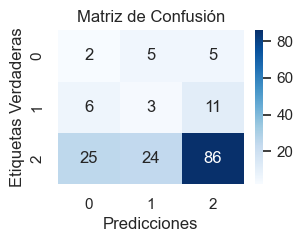



------
Parámetro C: 1000
Validación Cruzada (Precisión): 0.7820765271872901
Conjunto de Prueba (Precisión): 0.6933450608858414
Conjunto de Prueba (Exhaustividad): 0.5568862275449101
Conjunto de Prueba (Exactitud): 0.5568862275449101
Conjunto de Prueba (F1-Score): 0.6133825308425946

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.07      0.17      0.10        12
           1       0.09      0.15      0.11        20
           2       0.84      0.65      0.73       135

    accuracy                           0.56       167
   macro avg       0.33      0.32      0.31       167
weighted avg       0.69      0.56      0.61       167



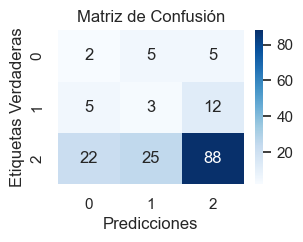



------


In [122]:
# Lista de valores para el parámetro de costo (C)
parametros_c = [0.1, 1, 5, 10, 20, 50, 100, 1000]

# Validación cruzada para cada valor de C en el modelo gaussiano
for c in parametros_c:
    # Inicializa el modelo SVM con kernel gaussiano y el valor de C actual
    svm_gaussiano = SVC(kernel='rbf', C=c, gamma='scale', random_state=42)
    scores = cross_val_score(svm_gaussiano, X_train, y_train, cv=5, scoring='accuracy')
    svm_gaussiano.fit(X_train, y_train)
    y_pred_svm_gaussiano = svm_gaussiano.predict(X_test)

    # Métricas en el conjunto de prueba
    precision = precision_score(y_test, y_pred_svm_gaussiano, average='weighted')
    recall = recall_score(y_test, y_pred_svm_gaussiano, average='weighted')
    accuracy = accuracy_score(y_test, y_pred_svm_gaussiano)
    f1 = f1_score(y_test, y_pred_svm_gaussiano, average='weighted')

    # Mostrar resultados
    print(f"Parámetro C: {c}")
    print(f"Validación Cruzada (Precisión): {scores.mean()}")
    print(f"Conjunto de Prueba (Precisión): {precision}")
    print(f"Conjunto de Prueba (Exhaustividad): {recall}")
    print(f"Conjunto de Prueba (Exactitud): {accuracy}")
    print(f"Conjunto de Prueba (F1-Score): {f1}")

    # Reporte de Clasificación
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred_svm_gaussiano))

    # Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred_svm_gaussiano)
    plt.figure(figsize=(3, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_gaussiano.classes_, yticklabels=svm_gaussiano.classes_)
    plt.title("Matriz de Confusión")
    plt.xlabel("Predicciones")
    plt.ylabel("Etiquetas Verdaderas")
    plt.show()

    # Separador
    print("\n\n------")

Se lleva a cabo un grid search de manera experimental para explorar la posibilidad de ajustar aún más los hiperparámetros, como γ, con el fin de potenciar el rendimiento del modelo.

# Random Forest

Algunas suposiciones que pueden respaldar su eficacia en comparación con los modelos anteriores de SVM incluyen:

* La capacidad de Random Forest para manejar conjuntos de datos complejos y no lineales de manera efectiva. Si el conjunto de datos de características de café exhibe relaciones no lineales o interacciones complejas entre las características, Random Forest podría ser más capaz de capturar estas complejidades.
* La robustez de Random Forest frente a datos ruidosos y atípicos. Si hay valores atípicos en el conjunto de datos de café, Random Forest puede manejarlos mejor que SVM, que tiende a ser más sensible a puntos extremos.
* El muestreo aleatorio y la selección aleatoria de características en Random Forest ayudan a reducir el riesgo de sobreajuste. Esto podría ser beneficioso si el conjunto de datos no es extremadamente grande y existe preocupación por el sobreajuste del modelo.
* La capacidad natural de Random Forest para manejar conjuntos de datos desbalanceados debido a la votación de árboles. Si las clases de colores de café no están balanceadas, Random Forest podría adaptarse mejor a esta situación.
* La capacidad de Random Forest para proporcionar información sobre la importancia de las características, lo que puede ser útil para comprender qué características contribuyen más a las predicciones del modelo.

In [123]:
X_train = df_smote.drop('Color', axis=1)
y_train = df_smote['Color']

X_test = df_test.drop('Color', axis=1)
y_test = df_test['Color']

In [124]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Entrenar el modelo en el conjunto de entrenamiento balanceado
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.7005988023952096

Classification Report:
               precision    recall  f1-score   support

           0       0.08      0.08      0.08        12
           1       0.11      0.10      0.11        20
           2       0.83      0.84      0.84       135

    accuracy                           0.70       167
   macro avg       0.34      0.34      0.34       167
weighted avg       0.69      0.70      0.70       167



## Grid Search - Hiperparámetros - Validación Cruzada

In [125]:
parametros_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, parametros_rf, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Entrena el modelo con la búsqueda de hiperparámetros en el conjunto de entrenamiento
grid_search_rf.fit(X_train, y_train)

# Obtiene el mejor modelo con los mejores hiperparámetros
best_rf = grid_search_rf.best_estimator_

# Realiza predicciones en el conjunto de prueba
y_pred_rf = best_rf.predict(X_test)

# Evalúa el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred_rf)
classification_rep = classification_report(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Mostrar resultados
print(f"Mejores hiperparámetros encontrados: {grid_search_rf.best_params_}")
print(f"Rendimiento del modelo con los mejores hiperparámetros en el conjunto de prueba:")
print(f"Precisión: {accuracy}")
print("\nClassification Report:")
print(classification_rep)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Mejores hiperparámetros encontrados: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Rendimiento del modelo con los mejores hiperparámetros en el conjunto de prueba:
Precisión: 0.7065868263473054

Classification Report:
              precision    recall  f1-score   support

           0       0.09      0.08      0.09        12
           1       0.12      0.10      0.11        20
           2       0.83      0.85      0.84       135

    accuracy                           0.71       167
   macro avg       0.35      0.35      0.34       167
weighted avg       0.69      0.71      0.70       167



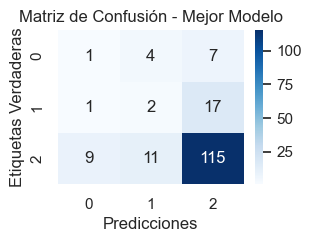

In [126]:
# Matriz de Confusión para el mejor modelo
cm_mejor_modelo = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(3, 2))
sns.heatmap(cm_mejor_modelo, annot=True, fmt='d', cmap='Blues', xticklabels=grid_search_rf.classes_, yticklabels=grid_search_rf.classes_)
plt.title("Matriz de Confusión - Mejor Modelo")
plt.xlabel("Predicciones")
plt.ylabel("Etiquetas Verdaderas")
plt.show()

## Visualización del modelo

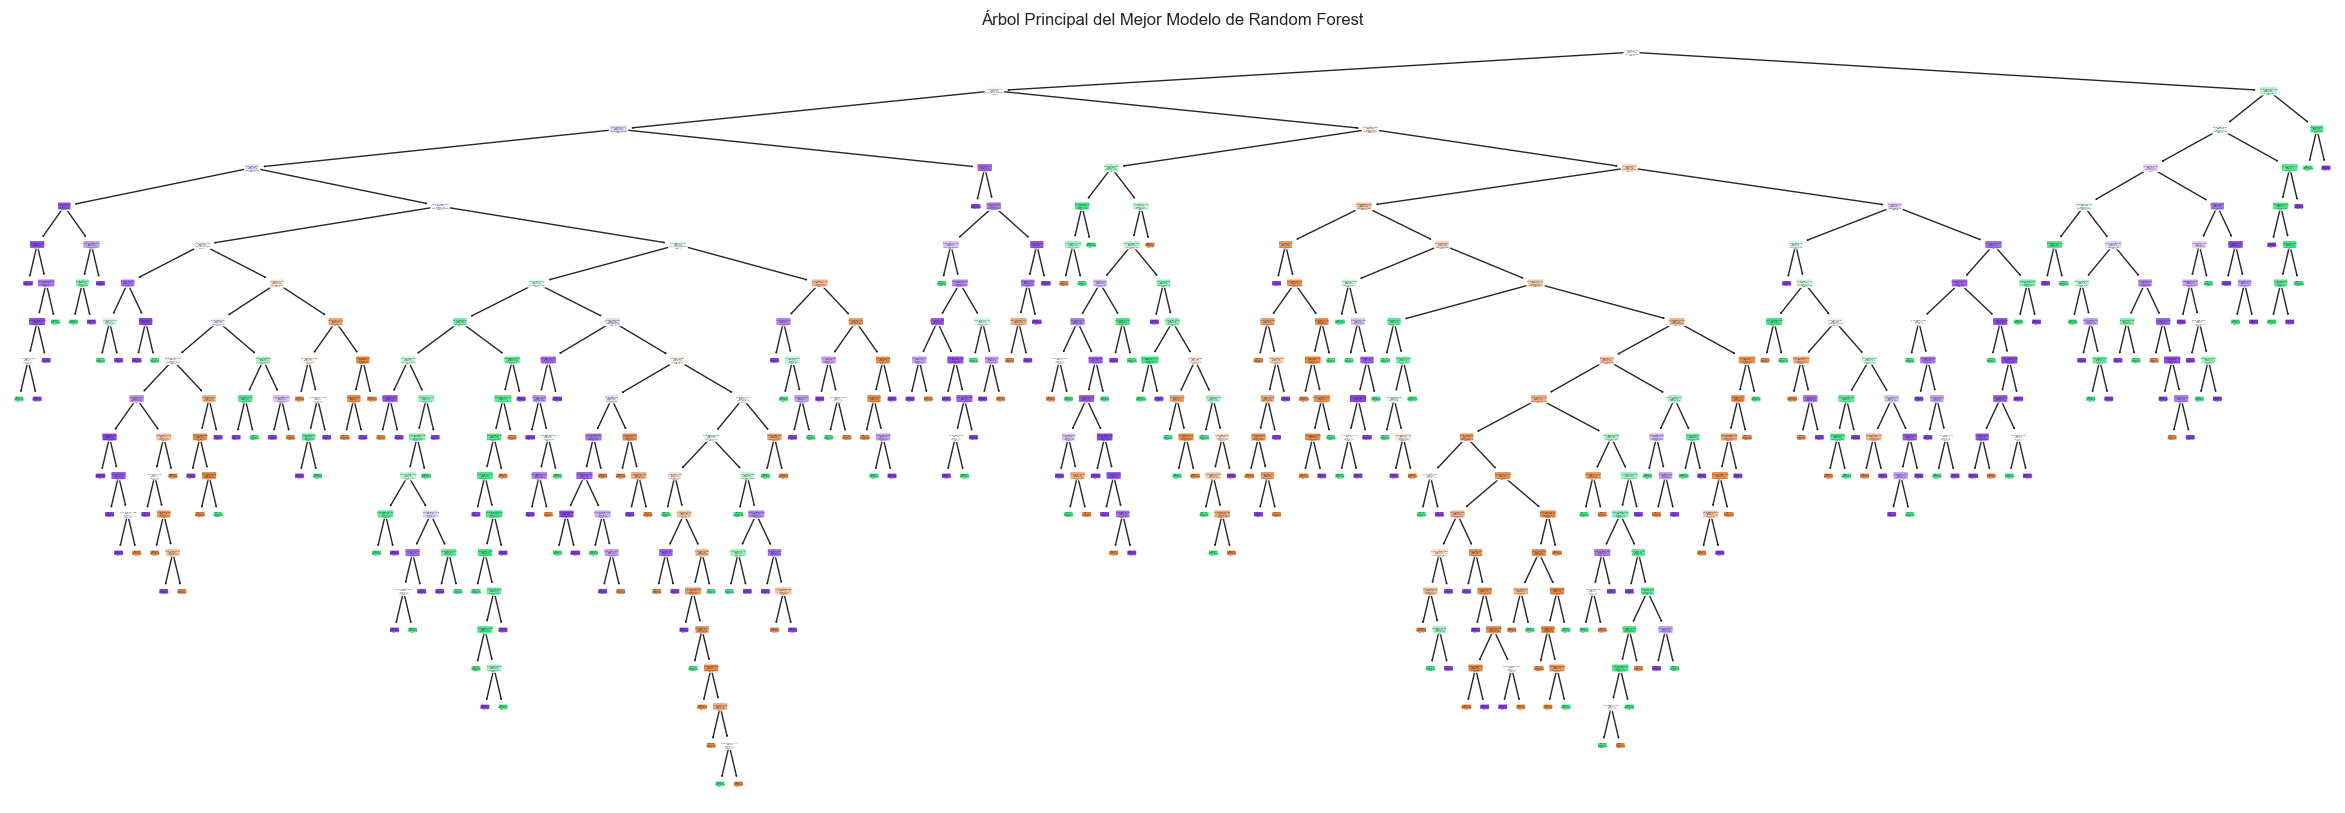

In [127]:
plt.figure(figsize=(30, 10))
class_names_str = best_rf.classes_.astype(str)
plot_tree(best_rf.estimators_[0], filled=True, feature_names=X_train.columns, class_names=class_names_str, rounded=True)
plt.title("Árbol Principal del Mejor Modelo de Random Forest")
plt.show()

### Primeros "n" árboles

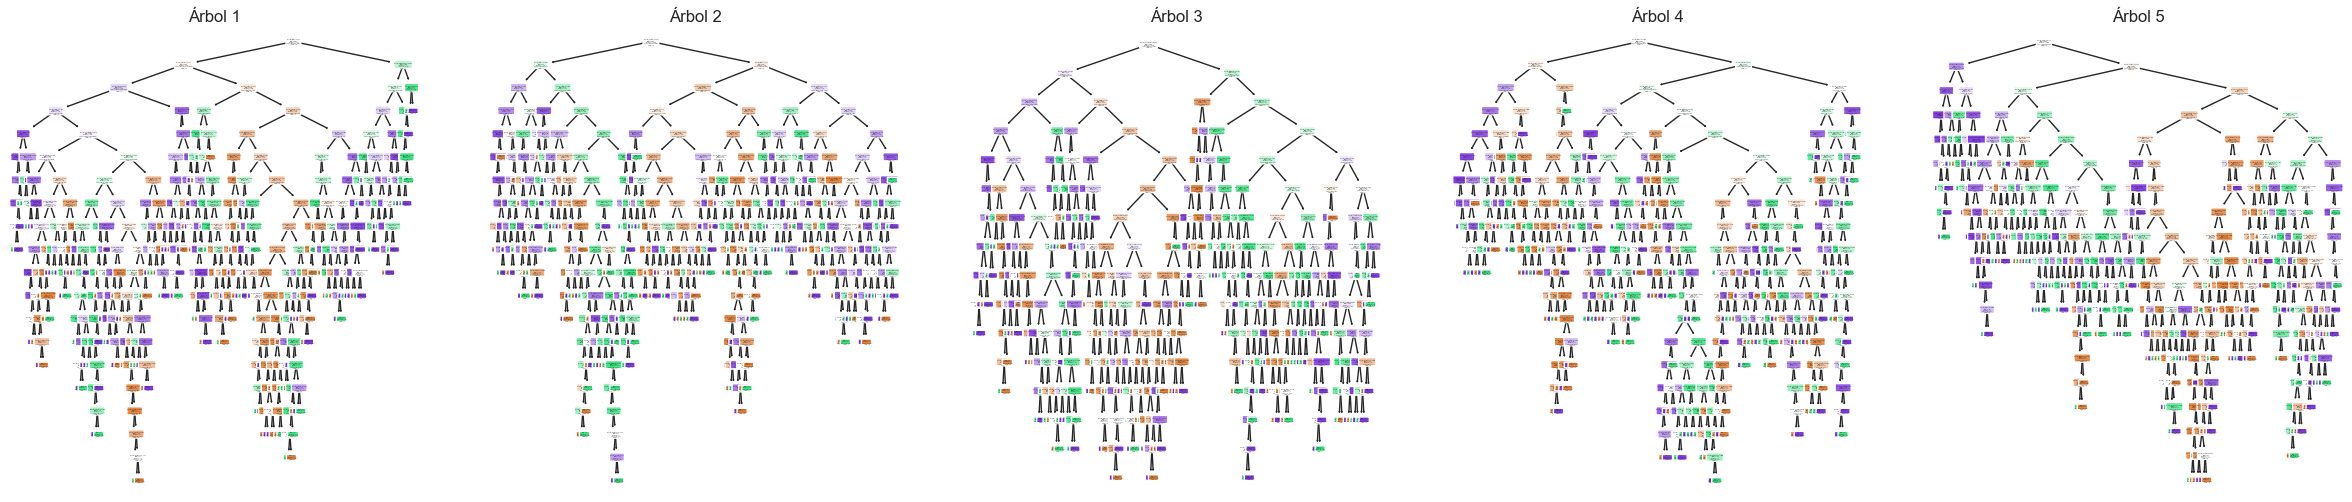

In [128]:
num_arboles = 5
# Cuadrícula de subgráficos
class_names_str = best_rf.classes_.astype(str)
fig, axes = plt.subplots(nrows=1, ncols=num_arboles, figsize=(30, 6))

# Mostrar los primeros 'num_arboles' árboles del bosque
for i in range(num_arboles):
    plot_tree(best_rf.estimators_[i], filled=True, feature_names=X_train.columns, class_names=class_names_str, rounded=True, ax=axes[i])
    axes[i].set_title(f"Árbol {i + 1}")

plt.show()


En este análisis, exploramos diferentes modelos de clasificación, como Support Vector Machines (SVM) con kernel lineal y gaussiano, así como Random Forest, para predecir el color de los granos de café en función de sus características. El objetivo principal fue desarrollar un modelo preciso y robusto capaz de generalizar bien a datos no vistos.

Abordamos el desafío de los datos desbalanceados en las clases de la variable objetivo, "Color", utilizando técnicas de preprocesamiento como el sobremuestreo (SMOTE) para contrarrestar el desbalanceo. Esta estrategia fue fundamental para mejorar la capacidad predictiva de los modelos, especialmente en casos donde ciertos colores estaban subrepresentados en el conjunto de datos original.

Durante la optimización de hiperparámetros, observamos que la selección cuidadosa de parámetros, como el término de penalización (C) en SVM y los valores de los hiperparámetros en Random Forest, tuvo un impacto significativo en el rendimiento del modelo. Específicamente, el modelo de ensamble, luego de una búsqueda exhaustiva de hiperparámetros, demostró ser altamente efectivo para este problema de clasificación de colores de granos de café con las características actuales del conjunto de datos.